In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

In [ ]:
# Esto es opcional tho
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ICD/PF/serieSensores.csv', parse_dates=['Time'], index_col='Time')

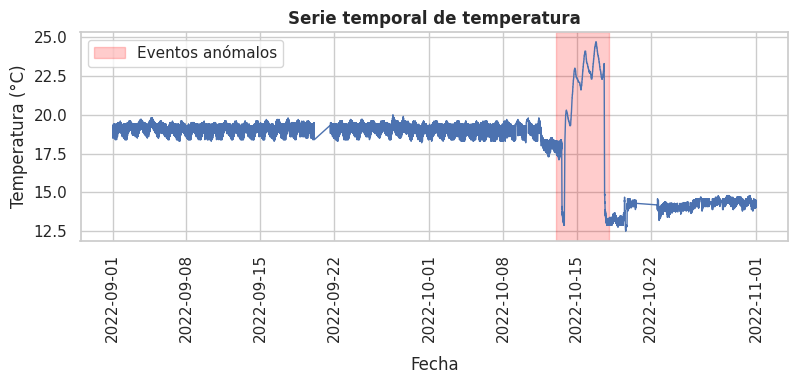

In [ ]:
plt.plot(df['Temperature'], linewidth=1)
plt.title('Serie temporal de temperatura', weight='bold')
plt.xlabel('Fecha', labelpad=10, )
plt.xticks(rotation=90)
plt.ylabel('Temperatura (°C)')

event_start1 = pd.to_datetime('2022-10-13')
event_end1 = pd.to_datetime('2022-10-18')
plt.axvspan(event_start1, event_end1, color='red', alpha=0.2, label='Eventos anómalos')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calcula la media móvil por hora (suavizado de 12 puntos = 1 hora) de la temperatura
df['mm_1h'] = df['Temperature'].rolling(window=12, center=True).mean()

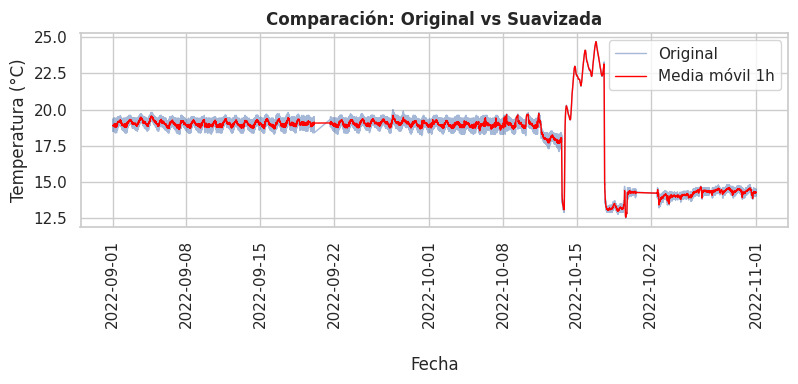

In [ ]:
# Comparación de ambas series (la original y la ya suavizada)
plt.plot(df['Temperature'], alpha=0.5, label='Original', linewidth=1)
plt.plot(df['mm_1h'], color='red', label='Media móvil 1h', linewidth=1)
plt.title('Comparación: Original vs Suavizada', weight = 'bold')
plt.xlabel('Fecha', labelpad=20)
plt.xticks(rotation=90)
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.tight_layout()
plt.show()

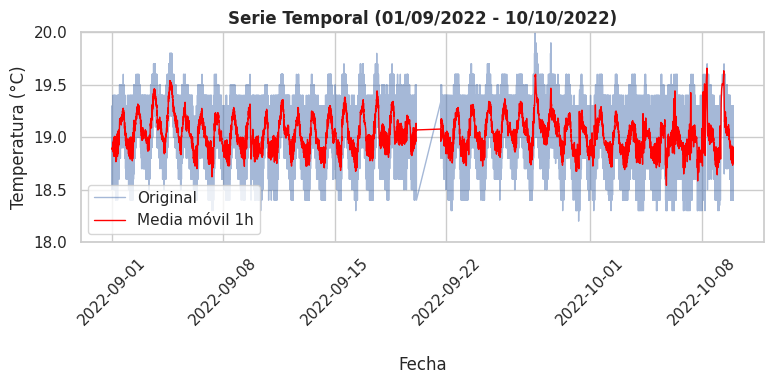

In [ ]:
# Zoom nomás para revisar la comparación a detalle
zoom_fecha = (df.index >= '2022-09-01') & (df.index < '2022-10-10')
plt.plot(df[zoom_fecha]['Temperature'], alpha=0.5, label='Original', linewidth=1)
plt.plot(df[zoom_fecha]['mm_1h'], color='red', label='Media móvil 1h', linewidth=1)
plt.title('Serie Temporal (01/09/2022 - 10/10/2022)', weight='bold')
plt.ylim(18, 20)
plt.xlabel('Fecha', labelpad=20)
plt.xticks(rotation=45)
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.tight_layout()
plt.show()

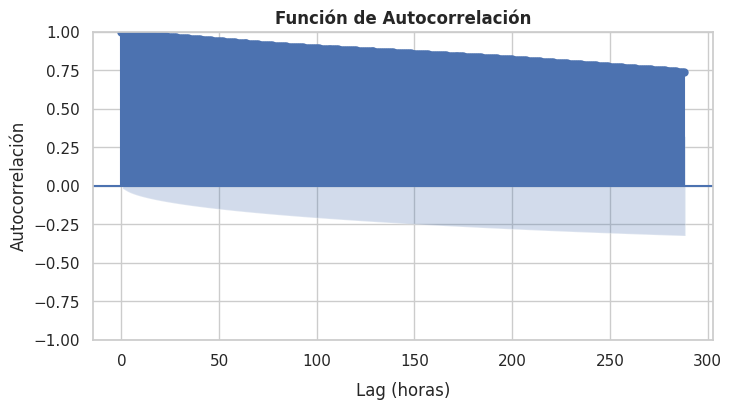

Lag con mayor autocorrelación: 1 (0.08333333333333333 horas)


In [ ]:
# Autocorrelación (o correlación consigo misma o algo así)
def get_max_autocorr(data, max_lag):  # 288 lags = 24h (5min*288)
    plot_acf(data, lags=max_lag, alpha=0.05) # 95% de confianza
    plt.title('Función de Autocorrelación', weight='bold')
    plt.xlabel('Lag (horas)', labelpad= 10)
    plt.ylabel('Autocorrelación')
    plt.show()

    autocorr = [data.autocorr(lag=i) for i in range(1, max_lag+1)]
    max_lag = pd.Series(autocorr).idxmax() + 1
    print(f"Lag con mayor autocorrelación: {max_lag} ({(max_lag*5)/60} horas)")

get_max_autocorr(df['Temperature'], max_lag=288)

#No entiendo

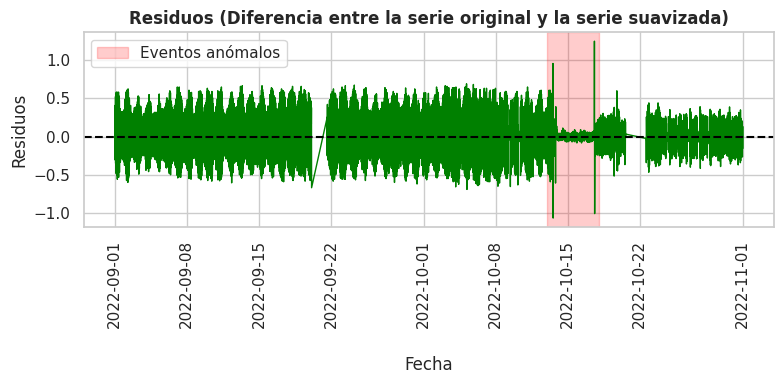



Análisis de Tendencia:
- La serie muestra un patrón estacional claro con ciclos diarios
- No se observa tendencia a largo plazo (media estable)
- Variación típica diaria: ~1.5-2.0°C
- Anomalías: Detectadas a mediados de octubre 


Análisis de Ciclos:
- Ciclo principal: 24 horas (variación entre día y noche)
- Patrón típico:
  * Mínimos: 18-19°C (madrugada)
  * Máximos: 19-20°C (tarde)
- No se detectan ciclos significativos de corto plazo (1-2 horas)


Explicación final:
1. Serie temporal: Datos de temperatura registrados aproximadamente cada 5 minutos.
2. Media móvil: Suavizado de los datos a 1 hora.
3. Autocorrelación: Relación entre la serie y versiones desplazadas de sí misma.
4. Tendencia: Comportamiento a largo plazo (en este caso, estacionalidad sin tendencia,
en sí se mantiene constante entre el día y la noche, pero se detectaron anomalías como
a mediados de octubre y algunas fechas donde no hay temperatura registrada)
5. Ciclos: Patrones repetitivos del día y la noche (ciclo 

In [ ]:
# %% Análisis de tendencia
analisis_tendencia="""
\nAnálisis de Tendencia:
- La serie muestra un patrón estacional claro con ciclos diarios
- No se observa tendencia a largo plazo (media estable)
- Variación típica diaria: ~1.5-2.0°C
- Anomalías: Detectadas a mediados de octubre """

# %% Análisis de ciclos
analisis_ciclos="""
\nAnálisis de Ciclos:
- Ciclo principal: 24 horas (variación entre día y noche)
- Patrón típico:
  * Mínimos: 18-19°C (madrugada)
  * Máximos: 19-20°C (tarde)
- No se detectan ciclos significativos de corto plazo (1-2 horas)
"""
# %% Cálculo de residuos
df['Residuos'] = df['Temperature'] - df['mm_1h']

# Graficar residuos
event_start1 = pd.to_datetime('2022-10-13')
event_end1 = pd.to_datetime('2022-10-18')
plt.plot(df['Residuos'], linewidth=1, color='green')
plt.title('Residuos (Diferencia entre la serie original y la serie suavizada)', weight='bold')
plt.xlabel('Fecha', labelpad=20)
plt.xticks(rotation=90)
plt.ylabel('Residuos')
plt.axvspan(event_start1, event_end1, color='red', alpha=0.2, label='Eventos anómalos')
plt.legend()
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# %% Explicación de términos
explicacion = """
Explicación final:
1. Serie temporal: Datos de temperatura registrados aproximadamente cada 5 minutos.
2. Media móvil: Suavizado de los datos a 1 hora.
3. Autocorrelación: Relación entre la serie y versiones desplazadas de sí misma.
4. Tendencia: Comportamiento a largo plazo (en este caso, estacionalidad sin tendencia,
en sí se mantiene constante entre el día y la noche, pero se detectaron anomalías como
a mediados de octubre y algunas fechas donde no hay temperatura registrada)
5. Ciclos: Patrones repetitivos del día y la noche (ciclo diario de 24 horas).
6. Residuos: Diferencias entre los valores de la serie observados y los valores de la serie suavizados.
"""
print(analisis_tendencia)
print(analisis_ciclos)
print(explicacion)